### IMPORT

In [1]:
# Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualization
import seaborn as sns

# Clustering Algorithms
from sklearn.cluster import DBSCAN

# PCA
from sklearn.decomposition import PCA

# sklearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### DATA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BukitVista/final_dataset_v2.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_name          360 non-null    object 
 1   property_id        360 non-null    object 
 2   property_name      360 non-null    object 
 3   property_bedrooms  360 non-null    int64  
 4   property_type      360 non-null    object 
 5   unit_id            360 non-null    object 
 6   unit_name          360 non-null    object 
 7   unit_type          360 non-null    object 
 8   bedroom            346 non-null    float64
 9   bathroom           346 non-null    float64
 10  beds               346 non-null    float64
 11  wifi               346 non-null    float64
 12  tv                 346 non-null    float64
 13  ac                 346 non-null    float64
 14  parking            346 non-null    float64
 15  pool               346 non-null    float64
 16  breakfast          343 non

,area_name,property_id,property_name,property_bedrooms,property_type,unit_id,unit_name,unit_type,bedroom,bathroom,...,tv,ac,parking,pool,breakfast,building_staff,status,price_per_unit,total_bookings,overall_rating
0,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1395,Room 1,Standard,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.170735e+06,138.0,4.702576
1,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1396,Room 2,Standard,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.201892e+06,143.0,4.824885
2,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1397,Room 3,Standard,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1,1.237458e+06,147.0,4.674419
3,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1398,Room 4,Standard,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.195869e+06,130.0,4.810275
4,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1399,Room 5,Standard,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.189912e+06,130.0,4.794189


In [5]:
property_type = df['property_type']
unit_type = df['unit_type']
area_name = df['area_name']
unit = df['unit_id']

In [6]:
df_nout = df[['area_name', 'unit_id',
         'price_per_unit', 'overall_rating', 'bedroom',
         'bathroom', 'beds', 'wifi', 'tv', 'ac',
         'parking', 'pool', 'breakfast','building_staff']]
df_nout.head()

,area_name,unit_id,price_per_unit,overall_rating,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff
0,Bingin,UN1395,1.170735e+06,4.702576,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,Bingin,UN1396,1.201892e+06,4.824885,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,Bingin,UN1397,1.237458e+06,4.674419,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,Bingin,UN1398,1.195869e+06,4.810275,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,Bingin,UN1399,1.189912e+06,4.794189,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [7]:
df_ut = df[['area_name', 'unit_id', 'unit_type',
         'price_per_unit', 'overall_rating', 'bedroom',
         'bathroom', 'beds', 'wifi', 'tv', 'ac',
         'parking', 'pool', 'breakfast','building_staff']]
df_ut.head()

,area_name,unit_id,unit_type,price_per_unit,overall_rating,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff
0,Bingin,UN1395,Standard,1.170735e+06,4.702576,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,Bingin,UN1396,Standard,1.201892e+06,4.824885,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,Bingin,UN1397,Standard,1.237458e+06,4.674419,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,Bingin,UN1398,Standard,1.195869e+06,4.810275,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,Bingin,UN1399,Standard,1.189912e+06,4.794189,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [8]:
df_ut = df_ut.dropna()
df_nout = df_nout.dropna()

### DATA TRANSFORMATION

In [9]:
label_encoder = LabelEncoder()

columns_to_encode = ['area_name']

for column in columns_to_encode:
  df_nout[column] = label_encoder.fit_transform(df_nout[column])

df_nout

<ipython-input-9-753dab8b6d14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nout[column] = label_encoder.fit_transform(df_nout[column])


,area_name,unit_id,price_per_unit,overall_rating,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff
0,0,UN1395,1.170735e+06,4.702576,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0,UN1396,1.201892e+06,4.824885,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0,UN1397,1.237458e+06,4.674419,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,0,UN1398,1.195869e+06,4.810275,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0,UN1399,1.189912e+06,4.794189,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,UN2884,1.160921e+06,4.757937,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
356,21,UN1223,1.185920e+06,4.559767,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
357,21,UN2786,1.941470e+06,4.756757,4.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
358,21,UN2355,1.456936e+06,4.423888,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [10]:
label_encoder = LabelEncoder()

columns_to_encode = ['area_name', 'unit_type']

for column in columns_to_encode:
  df_ut[column] = label_encoder.fit_transform(df_ut[column])

df_ut

,area_name,unit_id,unit_type,price_per_unit,overall_rating,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff
0,0,UN1395,74,1.170735e+06,4.702576,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0,UN1396,74,1.201892e+06,4.824885,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0,UN1397,74,1.237458e+06,4.674419,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,0,UN1398,74,1.195869e+06,4.810275,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0,UN1399,74,1.189912e+06,4.794189,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,UN2884,40,1.160921e+06,4.757937,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
356,21,UN1223,96,1.185920e+06,4.559767,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
357,21,UN2786,95,1.941470e+06,4.756757,4.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
358,21,UN2355,9,1.456936e+06,4.423888,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [11]:
df_nout['price_per_unit'] = (df_nout['price_per_unit']  - df_nout['price_per_unit'].min())/(df_nout['price_per_unit'].max() - df_nout['price_per_unit'].min())
df_nout['overall_rating'] = (df_nout['overall_rating']  - df_nout['overall_rating'].min())/(df_nout['overall_rating'].max() - df_nout['overall_rating'].min())

df_nout['bedroom'] = (df_nout['bedroom']  - df_nout['bedroom'].min())/(df_nout['bedroom'].max() - df_nout['bedroom'].min())
df_nout['bathroom'] = (df_nout['bathroom']  - df_nout['bathroom'].min())/(df_nout['bathroom'].max() - df_nout['bathroom'].min())
df_nout['beds'] = (df_nout['beds']  - df_nout['beds'].min())/(df_nout['beds'].max() - df_nout['beds'].min())

df_nout['area_name'] = (df_nout['area_name']  - df_nout['area_name'].min())/(df_nout['area_name'].max() - df_nout['area_name'].min())

#-----------------------------------------------------------

df_ut['price_per_unit'] = (df_ut['price_per_unit']  - df_ut['price_per_unit'].min())/(df_ut['price_per_unit'].max() - df_ut['price_per_unit'].min())
df_ut['overall_rating'] = (df_ut['overall_rating']  - df_ut['overall_rating'].min())/(df_ut['overall_rating'].max() - df_ut['overall_rating'].min())

df_ut['bedroom'] = (df_ut['bedroom']  - df_ut['bedroom'].min())/(df_ut['bedroom'].max() - df_ut['bedroom'].min())
df_ut['bathroom'] = (df_ut['bathroom']  - df_ut['bathroom'].min())/(df_ut['bathroom'].max() - df_ut['bathroom'].min())
df_ut['beds'] = (df_ut['beds']  - df_ut['beds'].min())/(df_ut['beds'].max() - df_ut['beds'].min())

df_ut['area_name'] = (df_ut['area_name']  - df_ut['area_name'].min())/(df_ut['area_name'].max() - df_ut['area_name'].min())
df_ut['unit_type'] = (df_ut['unit_type']  - df_ut['unit_type'].min())/(df_ut['unit_type'].max() - df_ut['unit_type'].min())

In [12]:
#df['price_per_unit'] = (df['price_per_unit']  - df['price_per_unit'].min())/(df['price_per_unit'].max() - df['price_per_unit'].min())
#df['total_bookings'] = (df['total_bookings']  - df['total_bookings'].min())/(df['total_bookings'].max() - df['total_bookings'].min())
#df['overall_rating'] = (df['overall_rating']  - df['overall_rating'].min())/(df['overall_rating'].max() - df['overall_rating'].min())

#df['bedroom'] = (df['bedroom']  - df['bedroom'].min())/(df['bedroom'].max() - df['bedroom'].min())
#df['bathroom'] = (df['bathroom']  - df['bathroom'].min())/(df['bathroom'].max() - df['bathroom'].min())
#df['beds'] = (df['beds']  - df['beds'].min())/(df['beds'].max() - df['beds'].min())

#df['area_name'] = (df['area_name']  - df['area_name'].min())/(df['area_name'].max() - df['area_name'].min())
#df['unit_type'] = (df['unit_type']  - df['unit_type'].min())/(df['unit_type'].max() - df['unit_type'].min())
#df['property_type'] = (df['property_type']  - df['property_type'].min())/(df['property_type'].max() - df['property_type'].min())
#df['property_bedrooms'] = (df['property_bedrooms']  - df['property_bedrooms'].min())/(df['property_bedrooms'].max() - df['property_bedrooms'].min())

In [36]:
normal_values_nout = Normalizer().fit_transform(df_nout.values)
print(normal_values_nout)

[[0.    0.071 0.364 ... 0.46  0.    0.   ]
 [0.    0.072 0.397 ... 0.453 0.    0.   ]
 [0.    0.069 0.323 ... 0.419 0.    0.419]
 ...
 [0.362 0.103 0.301 ... 0.362 0.    0.362]
 [0.368 0.075 0.22  ... 0.368 0.    0.   ]
 [0.363 0.071 0.28  ... 0.363 0.    0.   ]]


In [37]:
normal_values_ut = Normalizer().fit_transform(df_ut.values)
print(normal_values_ut)

[[0.    0.303 0.068 ... 0.438 0.    0.   ]
 [0.    0.299 0.069 ... 0.432 0.    0.   ]
 [0.    0.278 0.067 ... 0.402 0.    0.402]
 ...
 [0.345 0.306 0.098 ... 0.345 0.    0.345]
 [0.368 0.031 0.075 ... 0.368 0.    0.   ]
 [0.362 0.027 0.071 ... 0.362 0.    0.   ]]


### PCA

In [38]:
pca_nout = PCA()
pca_nout.fit(normal_values_nout)

X_pca_nout = pca_nout.transform(normal_values_nout)

In [39]:
pca_ut = PCA()
pca_ut.fit(normal_values_ut)

X_pca_ut = pca_ut.transform(normal_values_ut)

In [40]:
num_components = pca_nout.n_components_

print(f"Total number of principal components = {num_components}")

Total number of principal components = 13


In [41]:
num_components = pca_ut.n_components_

print(f"Total number of principal components = {num_components}")

Total number of principal components = 14


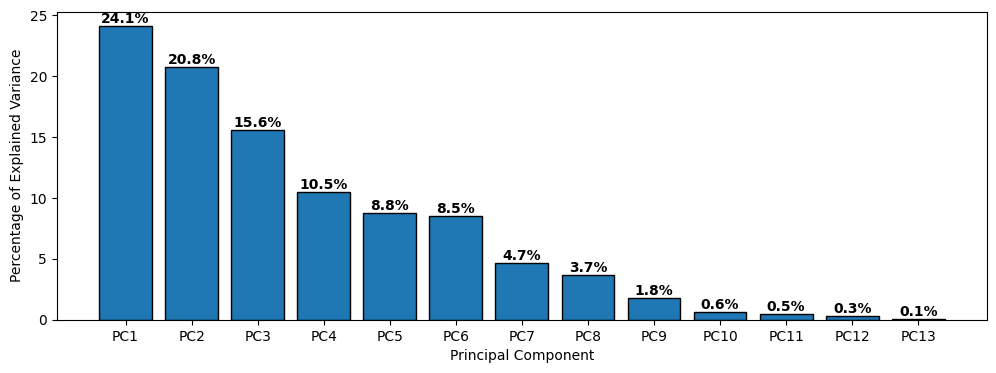

In [42]:
per_var = np.round(pca_nout.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels, edgecolor='black')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{per_var[i]}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

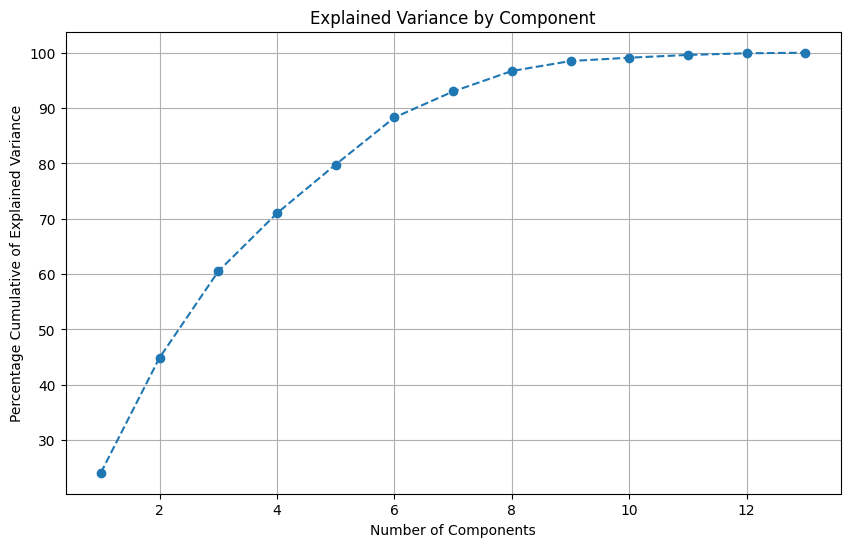

In [43]:
plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

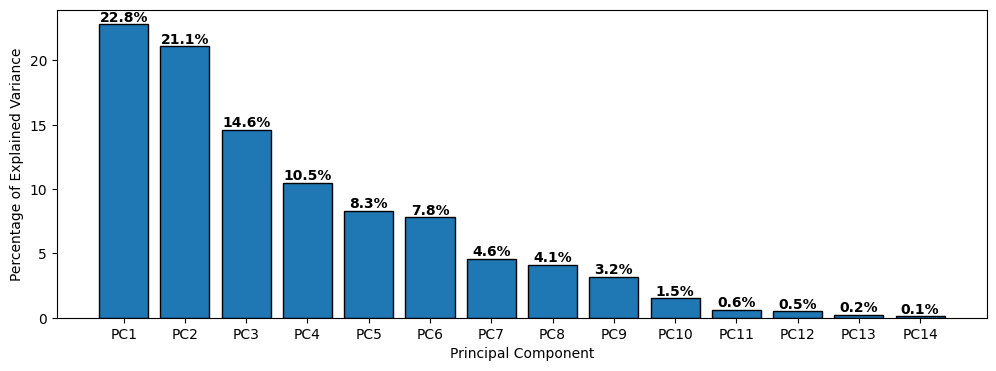

In [44]:
per_var = np.round(pca_ut.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels, edgecolor='black')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{per_var[i]}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

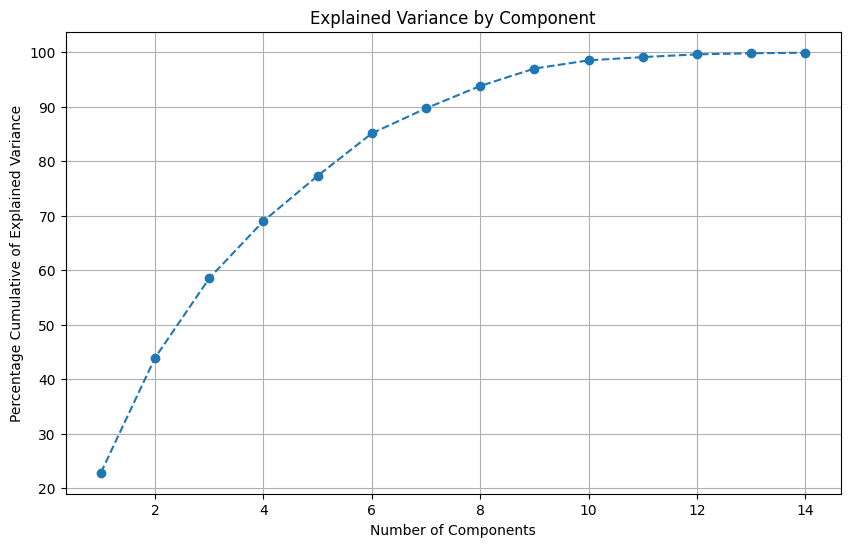

In [45]:
plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

In [106]:
'''colnames = list(df.columns)
pca_df = pd.DataFrame({
    'Features':colnames,
    'PC1':pca.components_[0], 'PC2':pca.components_[1], 'PC3':pca.components_[2], 'PC4':pca.components_[3],
    'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6], 'PC8':pca.components_[7],
    'PC9':pca.components_[8], 'PC10':pca.components_[9], 'PC11':pca.components_[10], 'PC12':pca.components_[11], 'PC13':pca.components_[12],
    'PC14':pca.components_[13],})

pca_df'''

"colnames = list(df.columns)\npca_df = pd.DataFrame({\n    'Features':colnames,\n    'PC1':pca.components_[0], 'PC2':pca.components_[1], 'PC3':pca.components_[2], 'PC4':pca.components_[3],\n    'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6], 'PC8':pca.components_[7],\n    'PC9':pca.components_[8], 'PC10':pca.components_[9], 'PC11':pca.components_[10], 'PC12':pca.components_[11], 'PC13':pca.components_[12],\n    'PC14':pca.components_[13],})\n\npca_df"

### DBSCAN

## Without unit type

In [61]:
num_comp = 7
epsilon = 0.36
minimum_sample = 6

### Calculate

In [62]:
pca_dbscan_nout = PCA(n_components = num_comp)
pca_dbscan_nout.fit(normal_values_nout)
scores_pca_dbscan_nout = pca_dbscan_nout.transform(normal_values_nout)

# Extract the absolute values of the PCA loadings
pca_loadings_analysis = pd.DataFrame(
    np.abs(pca_dbscan_nout.components_),
    columns=df_nout.columns,
    index=[f'PC{i+1}' for i in range(pca_dbscan_nout.n_components)]
)

# Identify the top contributing features for each principal component
top_features = pca_loadings_analysis.apply(lambda s: s.nlargest(5).index.tolist(), axis=1)

# Display the top contributing features for each principal component
pd.DataFrame(top_features)

,0
PC1,"[tv, building_staff, ac, wifi, breakfast]"
PC2,"[pool, building_staff, breakfast, area_name, tv]"
PC3,"[building_staff, pool, tv, area_name, wifi]"
PC4,"[breakfast, area_name, pool, ac, bathroom]"
PC5,"[area_name, breakfast, bedroom, bathroom, buil..."
PC6,"[parking, wifi, breakfast, ac, bathroom]"
PC7,"[ac, overall_rating, wifi, parking, tv]"


In [63]:
eps_val = 0.1

while eps_val <=0.5:
  db = DBSCAN(eps = eps_val, min_samples = 5).fit(scores_pca_dbscan_nout)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  print('eps_val :', eps_val)
  print('Number of Clusters :', n_clusters_)
  print('Number of Outliers :', n_noise_)
  print('')
  eps_val += 0.01

eps_val : 0.1
Number of Clusters : 21
Number of Outliers : 67

eps_val : 0.11
Number of Clusters : 19
Number of Outliers : 63

eps_val : 0.12
Number of Clusters : 19
Number of Outliers : 54

eps_val : 0.13
Number of Clusters : 19
Number of Outliers : 54

eps_val : 0.14
Number of Clusters : 19
Number of Outliers : 42

eps_val : 0.15000000000000002
Number of Clusters : 18
Number of Outliers : 42

eps_val : 0.16000000000000003
Number of Clusters : 18
Number of Outliers : 41

eps_val : 0.17000000000000004
Number of Clusters : 17
Number of Outliers : 41

eps_val : 0.18000000000000005
Number of Clusters : 17
Number of Outliers : 41

eps_val : 0.19000000000000006
Number of Clusters : 16
Number of Outliers : 41

eps_val : 0.20000000000000007
Number of Clusters : 15
Number of Outliers : 41

eps_val : 0.21000000000000008
Number of Clusters : 15
Number of Outliers : 41

eps_val : 0.22000000000000008
Number of Clusters : 15
Number of Outliers : 41

eps_val : 0.2300000000000001
Number of Clusters :

In [64]:
# fiddle with eps and min_samples for different results
db = DBSCAN(eps = epsilon, min_samples = minimum_sample).fit(scores_pca_dbscan_nout)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

Number of Clusters :  10
Number of Outliers :  19


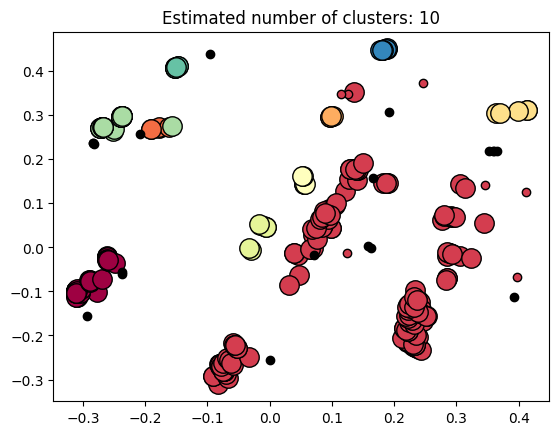

In [65]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = scores_pca_dbscan_nout[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = scores_pca_dbscan_nout[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [66]:
dt_nout = pd.DataFrame(scores_pca_dbscan_nout)

dt_nout["segment_dbscan_pca"] = db.labels_
dt_nout["segment"] = dt_nout["segment_dbscan_pca"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4", 4:"Cluster 5", 5:"Cluster 6", 6:"Cluster 7", 7:"Cluster 8", 8:"Cluster 9", 9:"Cluster 10"})
dt_nout['segment'].value_counts()

segment
Cluster 2     177
Cluster 1      63
Cluster 8      29
Cluster 10      9
Cluster 7       7
Cluster 9       7
Cluster 3       5
Cluster 4       5
Cluster 5       5
Cluster 6       5
Name: count, dtype: int64

In [82]:
'''cleaned_df = df.dropna()

dat1 = cleaned_df.reset_index(drop=True)
dat2 = dt_nout.reset_index(drop=True)

joined_dat = dat1.join(dat2)

joined_dat.to_csv('cluster_result_nout.csv')'''

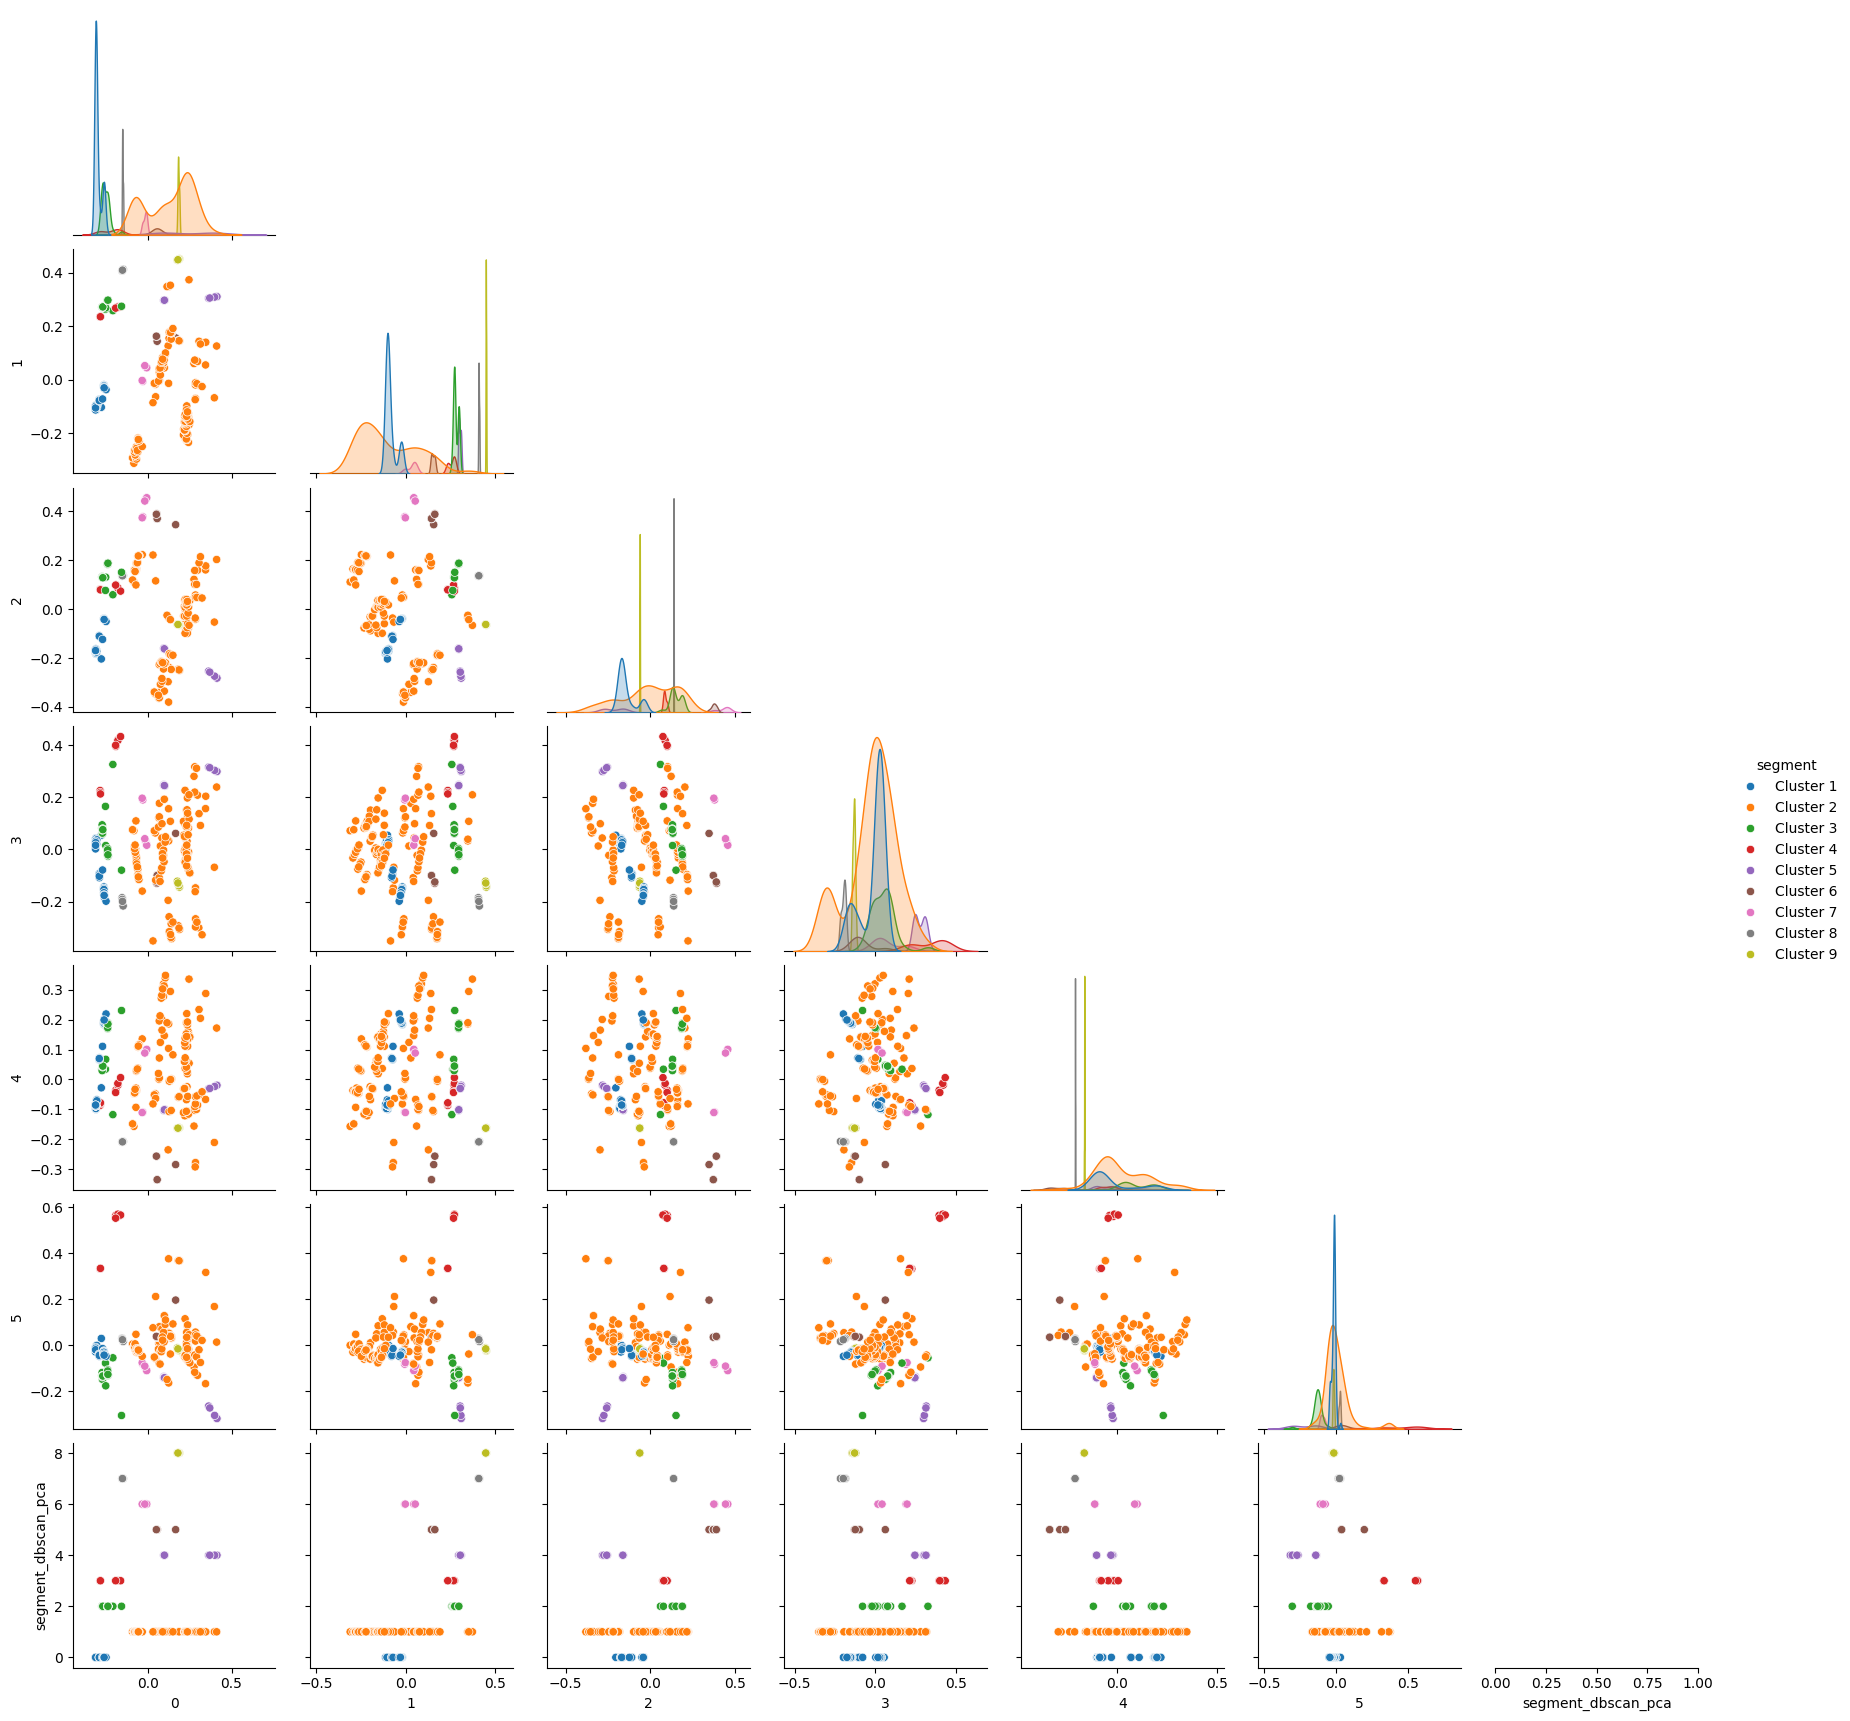

In [60]:
sns.pairplot(dt_nout, hue='segment', corner = True)
plt.show()

## With unit type

In [173]:
num_comp = 9
epsilon = 0.38
minimum_sample = 5

### Calculate

In [174]:
pca_dbscan_ut = PCA(n_components = num_comp)
pca_dbscan_ut.fit(normal_values_ut)
scores_pca_dbscan_ut = pca_dbscan_ut.transform(normal_values_ut)

# Extract the absolute values of the PCA loadings
pca_loadings_analysis = pd.DataFrame(
    np.abs(pca_dbscan_ut.components_),
    columns=df_ut.columns,
    index=[f'PC{i+1}' for i in range(pca_dbscan_ut.n_components)]
)

# Identify the top contributing features for each principal component
top_features = pca_loadings_analysis.apply(lambda s: s.nlargest(5).index.tolist(), axis=1)

# Display the top contributing features for each principal component
pd.DataFrame(top_features)

,0
PC1,"[tv, building_staff, wifi, ac, breakfast]"
PC2,"[pool, building_staff, breakfast, unit_type, tv]"
PC3,"[building_staff, pool, tv, area_name, wifi]"
PC4,"[breakfast, area_name, unit_type, pool, ac]"
PC5,"[area_name, breakfast, bedroom, bathroom, park..."
PC6,"[parking, breakfast, wifi, ac, pool]"
PC7,"[unit_type, ac, pool, wifi, bedroom]"
PC8,"[ac, unit_type, bathroom, overall_rating, tv]"
PC9,"[overall_rating, bedroom, unit_type, parking, ..."


In [175]:
eps_val = 0.1

while eps_val <=0.5:
  db = DBSCAN(eps = eps_val, min_samples = 5).fit(scores_pca_dbscan_ut)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  print('eps_val :', eps_val)
  print('Number of Clusters :', n_clusters_)
  print('Number of Outliers :', n_noise_)
  print('')
  eps_val += 0.01

eps_val : 0.1
Number of Clusters : 17
Number of Outliers : 143

eps_val : 0.11
Number of Clusters : 16
Number of Outliers : 131

eps_val : 0.12
Number of Clusters : 16
Number of Outliers : 127

eps_val : 0.13
Number of Clusters : 15
Number of Outliers : 119

eps_val : 0.14
Number of Clusters : 17
Number of Outliers : 104

eps_val : 0.15000000000000002
Number of Clusters : 16
Number of Outliers : 100

eps_val : 0.16000000000000003
Number of Clusters : 17
Number of Outliers : 87

eps_val : 0.17000000000000004
Number of Clusters : 17
Number of Outliers : 83

eps_val : 0.18000000000000005
Number of Clusters : 15
Number of Outliers : 74

eps_val : 0.19000000000000006
Number of Clusters : 14
Number of Outliers : 74

eps_val : 0.20000000000000007
Number of Clusters : 14
Number of Outliers : 61

eps_val : 0.21000000000000008
Number of Clusters : 15
Number of Outliers : 50

eps_val : 0.22000000000000008
Number of Clusters : 15
Number of Outliers : 50

eps_val : 0.2300000000000001
Number of Clus

In [176]:
# fiddle with eps and min_samples for different results
db = DBSCAN(eps = epsilon, min_samples = minimum_sample).fit(scores_pca_dbscan_ut)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

Number of Clusters :  9
Number of Outliers :  18


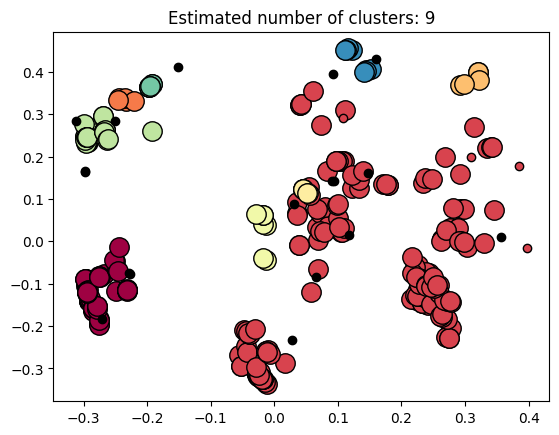

In [177]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = scores_pca_dbscan_nout[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = scores_pca_dbscan_nout[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [178]:
dt_nout = pd.DataFrame(scores_pca_dbscan_nout)

dt_nout["segment_dbscan_pca"] = db.labels_
dt_nout["segment"] = dt_nout["segment_dbscan_pca"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4", 4:"Cluster 5", 5:"Cluster 6", 6:"Cluster 7", 7:"Cluster 8", 8:"Cluster 9", 9:"Cluster 10"})
dt_nout['segment'].value_counts()

segment
Cluster 2    183
Cluster 1     63
Cluster 7     29
Cluster 9      9
Cluster 6      7
Cluster 8      7
Cluster 3      5
Cluster 4      5
Cluster 5      5
Name: count, dtype: int64

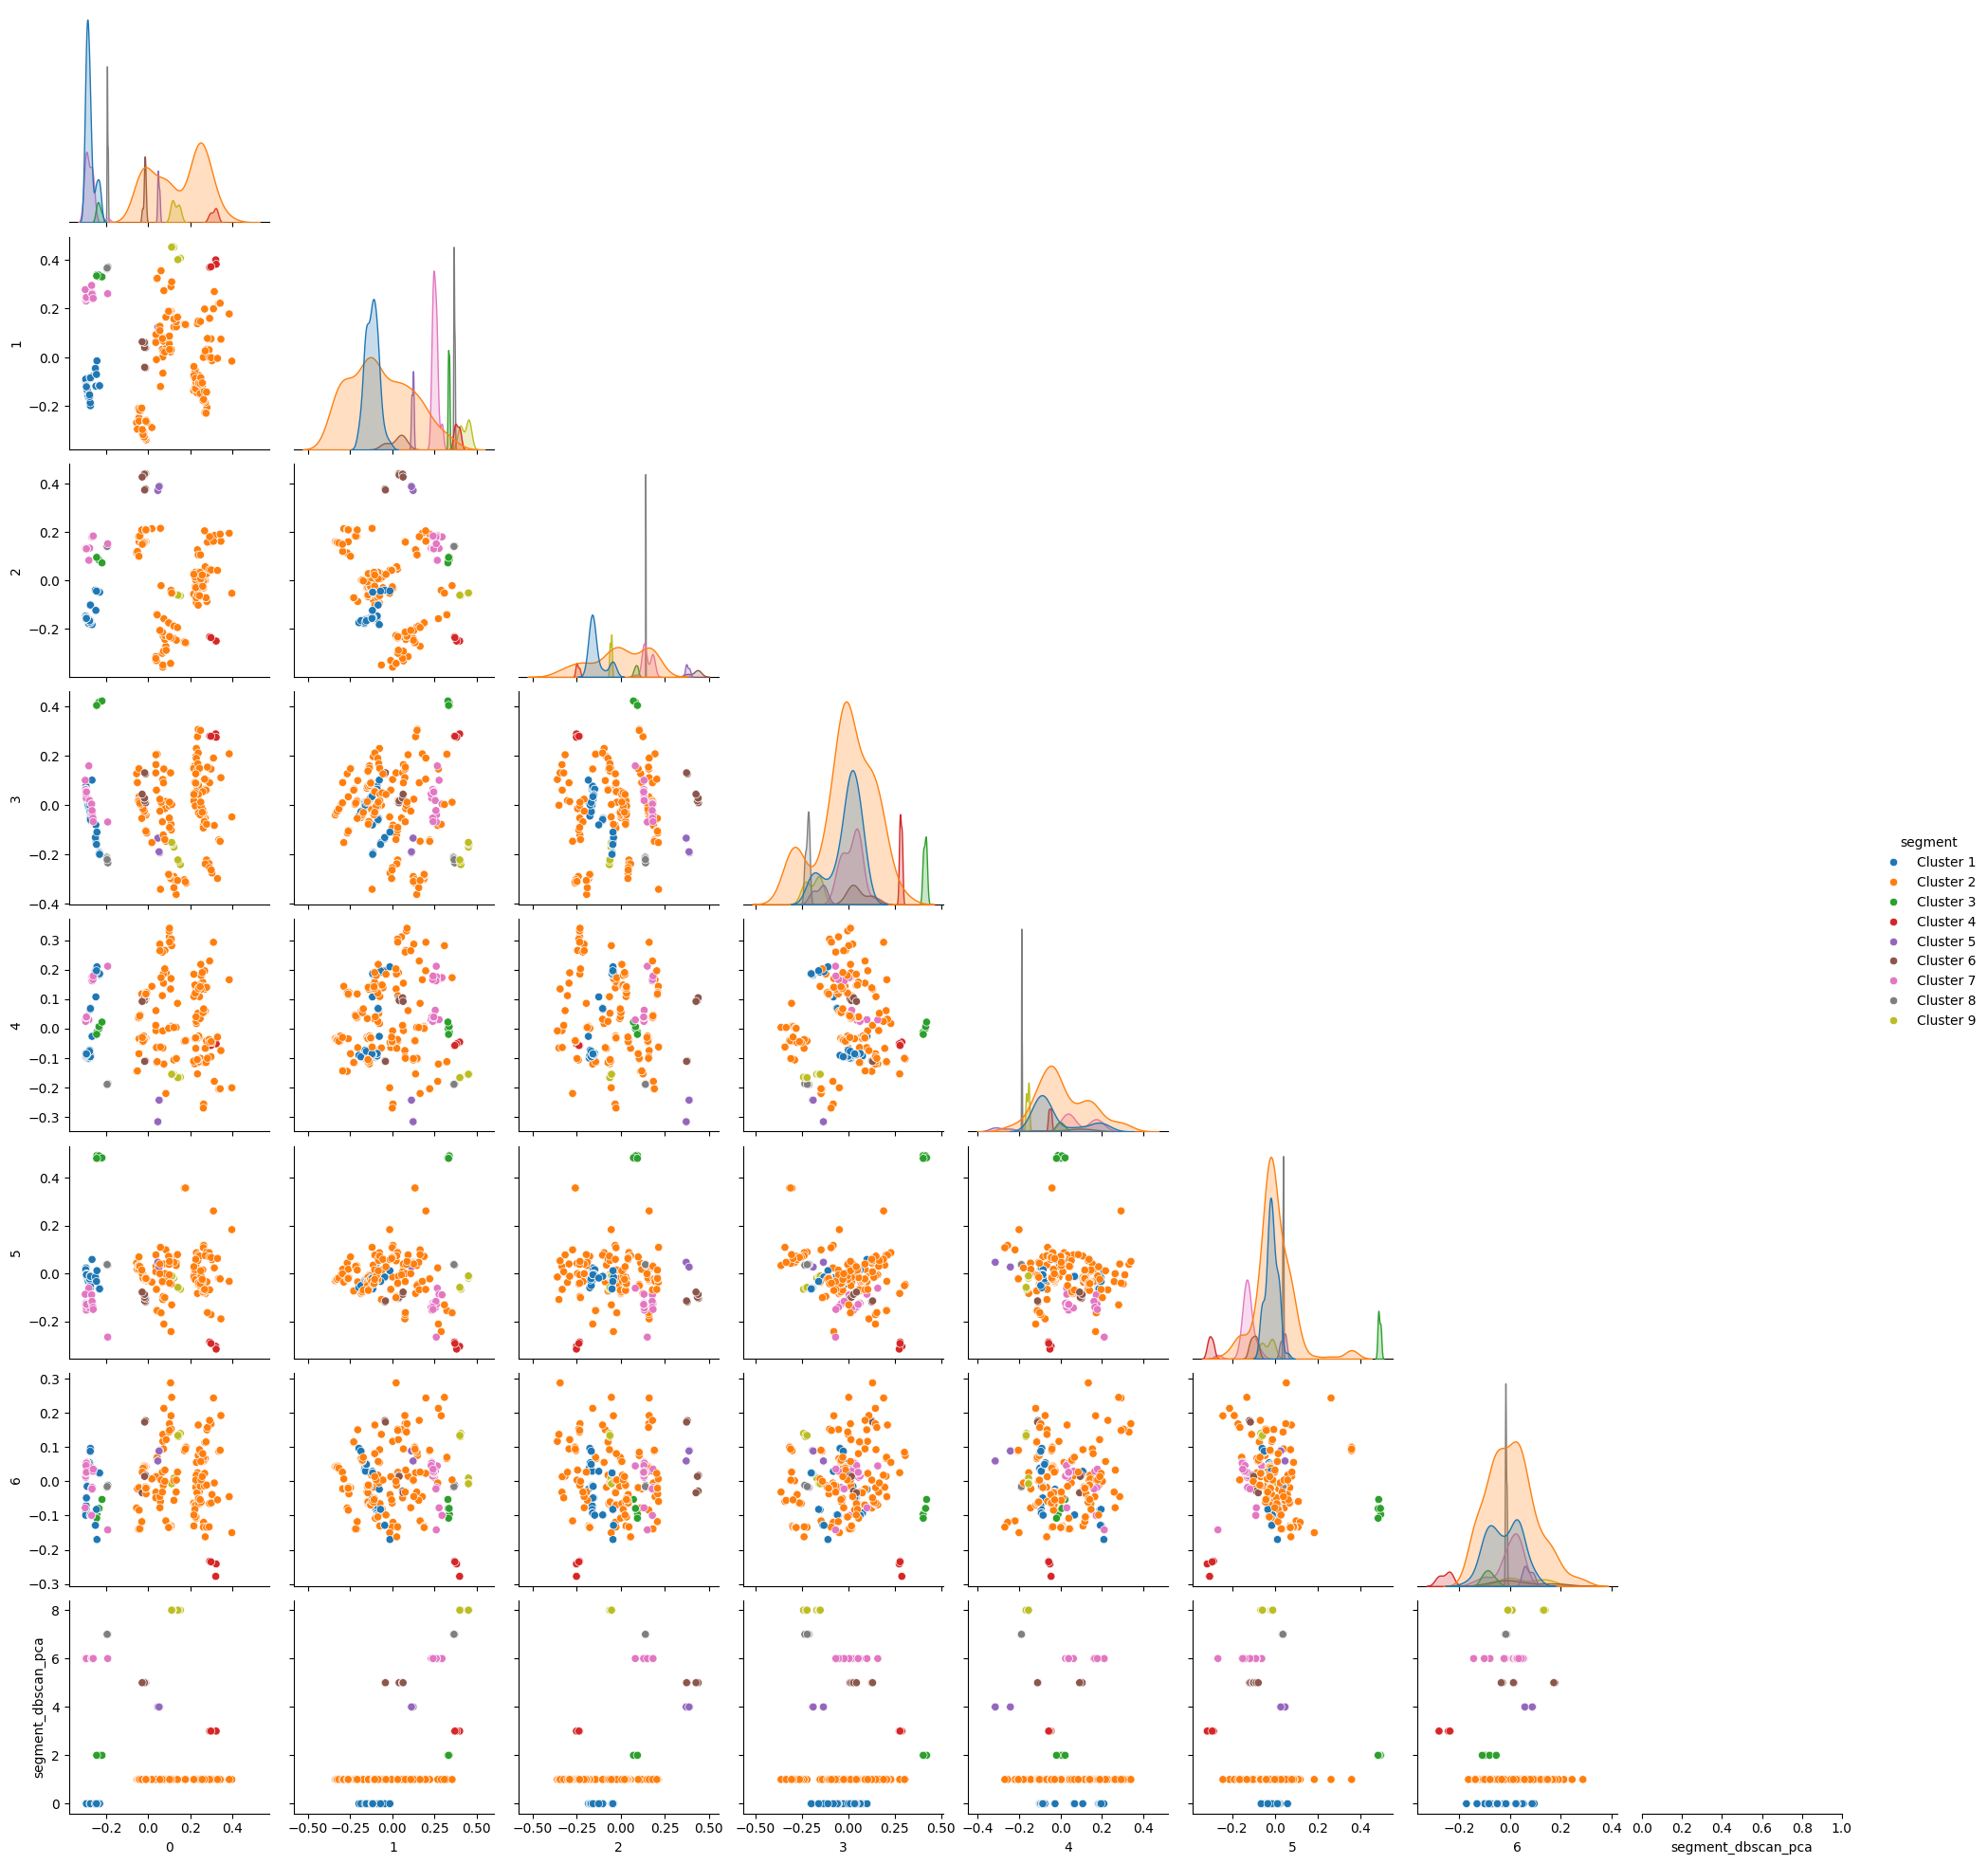

In [179]:
sns.pairplot(dt_nout, hue='segment', corner = True)
plt.show()